In [1]:
import numpy as np
import matplotlib.pyplot as plt

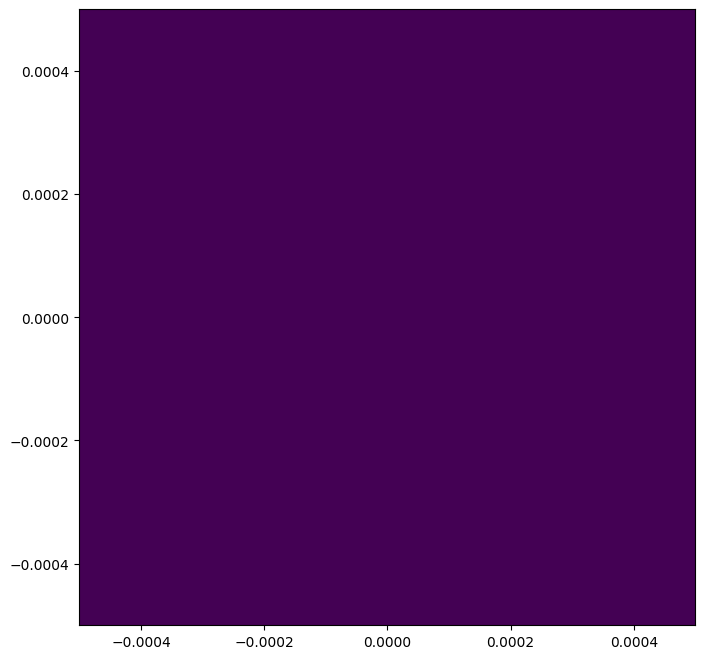

In [42]:
N = 4

wavelen = 500e-9
a = .05e-3   # semi X aperture
b = .1e-3   # semi Y aperture
dx = 3*a  # semi X separation
dy = 0      # semi Y separation

alpha_L = 5e-4

alpha_p = np.linspace(-alpha_L, alpha_L, 300)

alpha_x, alpha_y = np.meshgrid(alpha_p, alpha_p)

dif_term_x = np.sinc(2*alpha_x*a/wavelen)  # sinc(x) = sin(pi·x)/(pi·x)
dif_term_y = np.sinc(2*alpha_y*b/wavelen)

int_term_x = np.sin(2*alpha_x*dx*N/wavelen) / (np.sin(2*alpha_x*dx/wavelen) + 1e-10)
int_term_y = np.sin(2*alpha_y*dy*N/wavelen) / (np.sin(2*alpha_y*dy/wavelen) + 1e-10)

total_intensity = dif_term_x * dif_term_y * int_term_x * int_term_y

plt.figure(figsize=(8, 8))
plt.imshow(total_intensity, extent=(-alpha_L, alpha_L, -alpha_L, alpha_L))

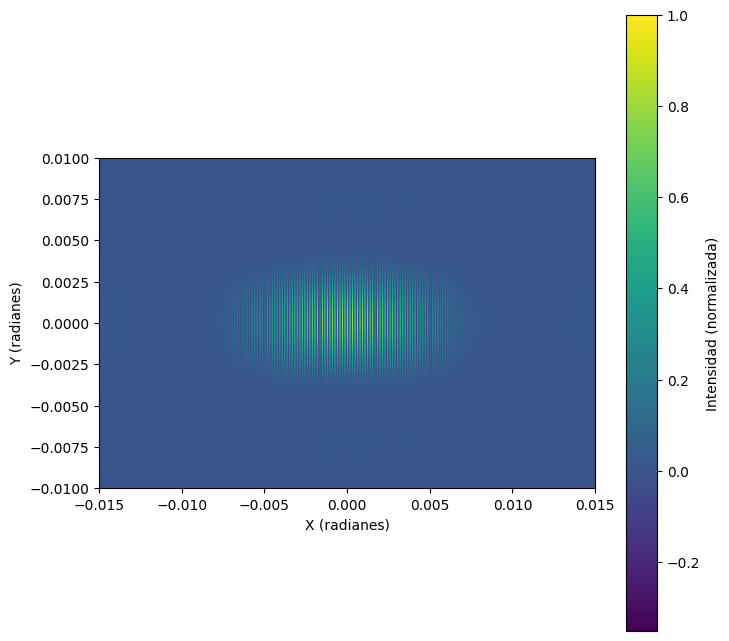

In [43]:
# Ahora vamos a generar una imagen del patrón de difracción en 2D en lugar del perfil de intensidad.
lim = 0.01

# Crear una cuadrícula para simular el patrón de difracción en la pantalla
x = np.linspace(-lim*1.5, lim*1.5, 1000)
y = np.linspace(-lim, lim, 1000)
X, Y = np.meshgrid(x, y)

# Calcular la función sinc en 2D para el patrón de difracción de un solo rectángulo
beta_x_2d = (np.pi * a * X) / wavelen
beta_y_2d = (np.pi * b * Y) / wavelen
intensity_single_2d = (np.sinc(beta_x_2d / np.pi) ** 2) * (np.sinc(beta_y_2d / np.pi) ** 2)

# Calcular la función de interferencia para N rectángulos
phase_difference = 2 * np.pi * dx * beta_y_2d / wavelen
interference_term = (np.sin(N * phase_difference / 2) / np.sin(phase_difference / 2)) ** 2

# Patrón de difracción total en 2D (intensidad)
intensity_total_2d = intensity_single_2d * interference_term_2d

# Normalizar la intensidad
intensity_total_2d /= np.max(intensity_total_2d)

# Graficar el patrón de difracción en 2D
plt.figure(figsize=(8, 8))
plt.imshow(intensity_total_2d, extent=(-lim*1.5, lim*1.5, -lim, lim), cmap='viridis')
# plt.title("Patrón de Difracción de Fraunhofer en 2D para Tres Rectángulos")
plt.xlabel("X (radianes)")
plt.ylabel("Y (radianes)")
plt.colorbar(label="Intensidad (normalizada)")
plt.show()


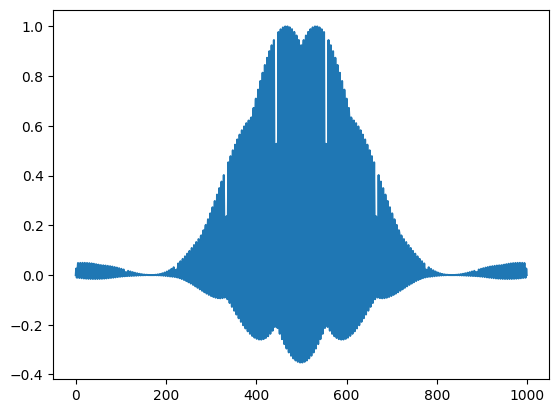

In [44]:
plt.plot(intensity_total_2d[500,:])

In [ ]:
# Definir las constantes
wavelen = 500e-9  # Longitud de onda en metros (500 nm)
screen_distance = 1.0  # Distancia a la pantalla en metros
rect_width = 50e-6  # Ancho de cada rectángulo (rendija) en metros
rect_height = 100e-6  # Altura de cada rectángulo (rendija) en metros
separation = 150e-6  # Separación entre los centros de los rectángulos en metros
N = 3  # Número de rectángulos

# Crear un rango de ángulos para calcular la intensidad en la pantalla
theta = np.linspace(-0.01, 0.01, 1000)  # Rango angular en radianes

# Calcular la función sinc para el patrón de difracción de un solo rectángulo
beta_x = (np.pi * rect_width * np.sin(theta)) / wavelength
beta_y = (np.pi * rect_height * np.sin(theta)) / wavelength
intensity_single = (np.sinc(beta_x / np.pi) ** 2) * (np.sinc(beta_y / np.pi) ** 2)

# Calcular la función de interferencia para N rectángulos
phase_difference = 2 * np.pi * separation * np.sin(theta) / wavelength
interference_term = (np.sin(N * phase_difference / 2) / np.sin(phase_difference / 2)) ** 2

# Patrón de difracción total (intensidad)
intensity_total = intensity_single * interference_term

# Normalizar la intensidad
intensity_total /= np.max(intensity_total)

# Graficar el patrón de difracción
plt.figure(figsize=(10, 6))
plt.plot(theta, intensity_total, color='blue')
plt.title(f"Patrón de Difracción de Fraunhofer para {N} Rectángulos")
plt.xlabel("Ángulo (radianes)")
plt.ylabel("Intensidad (normalizada)")
plt.grid(True)
plt.show()

# Crear una cuadrícula para simular el patrón de difracción en la pantalla en 2D
x = np.linspace(-0.01, 0.01, 1000)
y = np.linspace(-0.01, 0.01, 1000)
X, Y = np.meshgrid(x, y)

# Calcular la función sinc en 2D para el patrón de difracción de un solo rectángulo
beta_x_2d = (np.pi * rect_width * X) / wavelength
beta_y_2d = (np.pi * rect_height * Y) / wavelength
intensity_single_2d = (np.sinc(beta_x_2d / np.pi) ** 2) * (np.sinc(beta_y_2d / np.pi) ** 2)

# Calcular la función de interferencia en 2D para N rectángulos
phase_difference_2d = 2 * np.pi * separation * X / wavelength
interference_term_2d = (np.sin(N * phase_difference_2d / 2) / np.sin(phase_difference_2d / 2)) ** 2

# Patrón de difracción total en 2D (intensidad)
intensity_total_2d = intensity_single_2d * interference_term_2d

# Normalizar la intensidad
intensity_total_2d /= np.max(intensity_total_2d)

# Graficar el patrón de difracción en 2D
plt.figure(figsize=(8, 8))
plt.imshow(intensity_total_2d, extent=(-0.01, 0.01, -0.01, 0.01), cmap='viridis')
plt.title(f"Patrón de Difracción de Fraunhofer en 2D para {N} Rectángulos")
plt.xlabel("X (radianes)")
plt.ylabel("Y (radianes)")
plt.colorbar(label="Intensidad (normalizada)")
plt.show()
